<a href="https://colab.research.google.com/github/bouncing-seal/lab_3_4/blob/master/Vybory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Election analysis

## 0. Importing all the required modules

In [2]:
!pip install geopandas


import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

     |████████████████████████████████| 921kB 8.5MB/s 
     |████████████████████████████████| 10.1MB 1.3MB/s 
     |████████████████████████████████| 11.8MB 67.3MB/s 


## 1. Getting the data

### Creating a parser for the website

In [0]:
list_of_TIKS = []
for i in range (1, 31):
    list_of_TIKS.append('Территориальная избирательная комиссия №' + str(i))

num_of_voters = []
num_of_voters_voted = []
appearence = []
votes_for_Amosov_percent = []
votes_for_Beglov_percent = []
votes_for_Tikhonova_percent = []

url = "http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&root=1&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217417&type=222"
response = requests.get(url)
page = BeautifulSoup(response.content, "lxml")

main_links = page.find_all('a')
for TIK in list_of_TIKS:
    for main_tag in main_links:
        main_link = main_tag.get('href')
        if TIK in main_tag:
            current_TIK = pd.read_html(main_link, encoding='cp1251',  header=0)[7]
            
            num_of_voters.extend(int(current_TIK.iloc[0,i]) for i in range (len(current_TIK.columns)))
            num_of_voters_voted.extend(int(current_TIK.iloc[2,i]) + int(current_TIK.iloc[3,i]) for i in range (len(current_TIK.columns)))
            appearence.extend(round((int(current_TIK.iloc[2,i]) + int(current_TIK.iloc[3,i]))/int(current_TIK.iloc[0,i])*100, 2) for i in range (len(current_TIK.columns)))
            
            votes_for_Amosov_percent.extend(round(float(current_TIK.iloc[12,i][-6]+current_TIK.iloc[12,i][-5]+current_TIK.iloc[12,i][-4]+current_TIK.iloc[12,i][-3]+current_TIK.iloc[12,i][-2]),2) for i in range (len(current_TIK.columns)))
            votes_for_Beglov_percent.extend(round(float(current_TIK.iloc[13,i][-6]+current_TIK.iloc[13,i][-5]+current_TIK.iloc[13,i][-4]+current_TIK.iloc[13,i][-3]+current_TIK.iloc[13,i][-2]),2) for i in range (len(current_TIK.columns)))
            votes_for_Tikhonova_percent.extend(round(float(current_TIK.iloc[14,i][-6]+current_TIK.iloc[14,i][-5]+current_TIK.iloc[14,i][-4]+current_TIK.iloc[14,i][-3]+current_TIK.iloc[14,i][-2]),2) for i in range (len(current_TIK.columns)))


### Data management

In [0]:
interval = 1

interval_num_of_UIKs = []

for i in range (int(100/interval+1/interval)):
    interval_num_of_UIKs.append(0)

for i in range (0, int(100/interval+1/interval), interval):
    for j in range (len(appearence)):
        if appearence[j] < (i + interval/2) and appearence[j] >= (i - interval/2):
            interval_num_of_UIKs[i] = interval_num_of_UIKs[i] + 1

### Plotting data

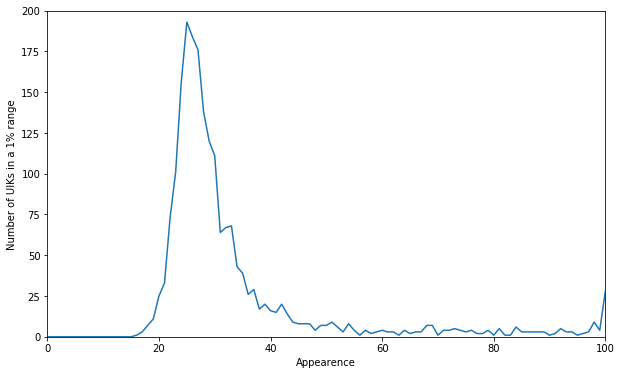

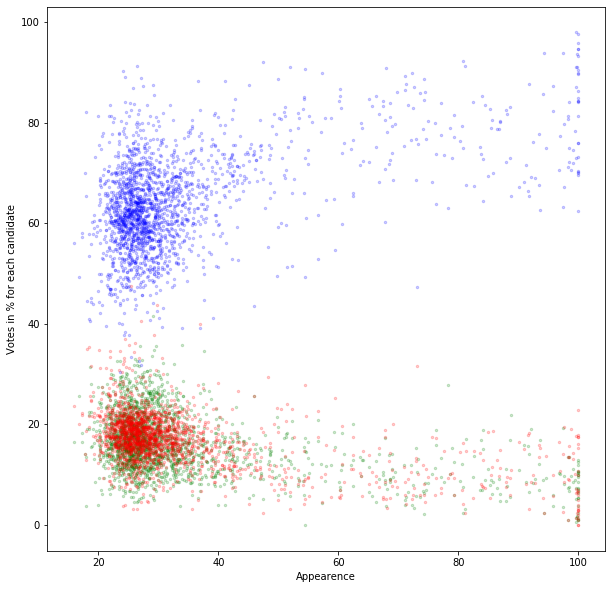

In [5]:
#Number of UIKs (appearence)

plt.figure(figsize=(10, 6))
plt.plot(interval_num_of_UIKs)
plt.axis([0, 100, 0, 200])
plt.ylabel('Number of UIKs in a 1% range')
plt.xlabel('Appearence')
plt.show()

#Votes in percent (appearence)

plt.figure(figsize=(10, 10))
plt.scatter(appearence, votes_for_Amosov_percent, c = 'g', s = 6, alpha=0.2)
plt.scatter(appearence, votes_for_Beglov_percent, c = 'b', s = 6, alpha=0.2)
plt.scatter(appearence, votes_for_Tikhonova_percent, c = 'r', s = 6, alpha=0.2)
plt.ylabel('Votes in % for each candidate')
plt.xlabel('Appearence')
plt.show()

## 2. Vizualization
Because of the data given the dictionary for the further GeoDataframe is written manually

In [0]:
current_UIK = pd.read_html(url, encoding='cp1251',  header=0)[7]

num_of_voters_dist = []
num_of_voters_voted_dist = []
appearence_dist = []

for j in [num_of_voters_dist, num_of_voters_voted_dist, appearence_dist]:
    j.extend(0 for i in range (18))

districts = {
    '0' : [1], #Адмиралтейский
    '1' : [2], #Василеостровский 
    '2' : [18], #Петроградский
    '3' : [16, 30], #Центральный
    '4' : [10, 14, 22], #Выборгский
    '5' : [11, 17], #Калининский
    '6' : [4, 25], #Красногвардейский
    '7' : [5, 24], #Невский
    '8' : [23, 29], #Фрунзенский
    '9' : [9, 12, 28], #Приморский
    '10' : [13], #Курортный
    '11' : [15], #Кронштадтский
    '12' : [21], #Колпинский
    '13' : [20], #Пушкинский
    '14' : [19, 27], #Московский
    '15' : [3, 7], #Кировский
    '16' : [6, 26], #Красносельский
    '17' : [8] #Петродворцовый
}

for i in districts.keys():
    for k in range (1, 31):
        if k in districts[i]:
            num_of_voters_dist[int(i)]= num_of_voters_dist[int(i)] + int(current_UIK.iloc[0,k-1])
            num_of_voters_voted_dist[int(i)] = num_of_voters_voted_dist[int(i)] + int(current_UIK.iloc[2,k-1]) + int(current_UIK.iloc[3,k-1])

for i in range (18):
    appearence_dist[i] = round(num_of_voters_voted_dist[i]/num_of_voters_dist[i]*100, 2)

### Creating GeoDataFrame

In [0]:
SPb_shapes= gpd.read_file('/shapes/Administrative_Discrits.shp', encoding='cp1251')
#/content/Administrative_Discrits.shp
#/Administrative_Discrits.shx
#/shapes

temp = pd.DataFrame({'Количество избирателей': num_of_voters_dist, 'Явка':appearence_dist })
temp['Район'] = SPb_shapes[['Район']]
temp['geometry'] = SPb_shapes[['geometry']]
SPB_elections_visualization = gpd.GeoDataFrame(temp)

In [21]:
current_UIK = current_UIK.replace(regex=' [0-9]*.[0-9]*%', value='')
percentage = current_UIK.iloc[12:,:-1]
percentage = percentage.rename(index={12:'Amosov', 13:'Beglov', 14:'Tikhonova'})
percentage = percentage.astype(int)
winner = percentage.idxmax(axis=0)
SPB_elections_visualization['Winner'] = list(winner[0:18])
SPB_elections_visualization


,Количество избирателей,Явка,Район,geometry,Winner
0,105510,31.48,Адмиралтейский,"POLYGON ((3373862.288 8386676.007, 3374379.950...",Beglov
1,147015,31.79,Василеостровский,"POLYGON ((3373864.861 8386714.090, 3373856.296...",Beglov
2,94434,51.53,Петроградский,"POLYGON ((3373924.810 8387418.975, 3373927.665...",Beglov
3,146350,29.99,Центральный,"POLYGON ((3373933.375 8387398.958, 3377701.645...",Beglov
4,357721,30.21,Выборгский,"POLYGON ((3378488.129 8389146.159, 3377728.765...",Beglov
5,358677,27.52,Калининский,"POLYGON ((3378525.241 8389152.593, 3378535.232...",Beglov
6,261207,29.68,Красногвардейский,"POLYGON ((3384253.297 8390009.035, 3384975.906...",Beglov
7,381414,26.72,Невский,"POLYGON ((3385142.909 8380914.502, 3387054.164...",Beglov
8,299683,29.59,Фрунзенский,"POLYGON ((3376633.612 8380374.755, 3377229.541...",Beglov
9,415345,28.58,Приморский,"POLYGON ((3364708.606 8395208.805, 3364635.809...",Beglov


### Winner in each district

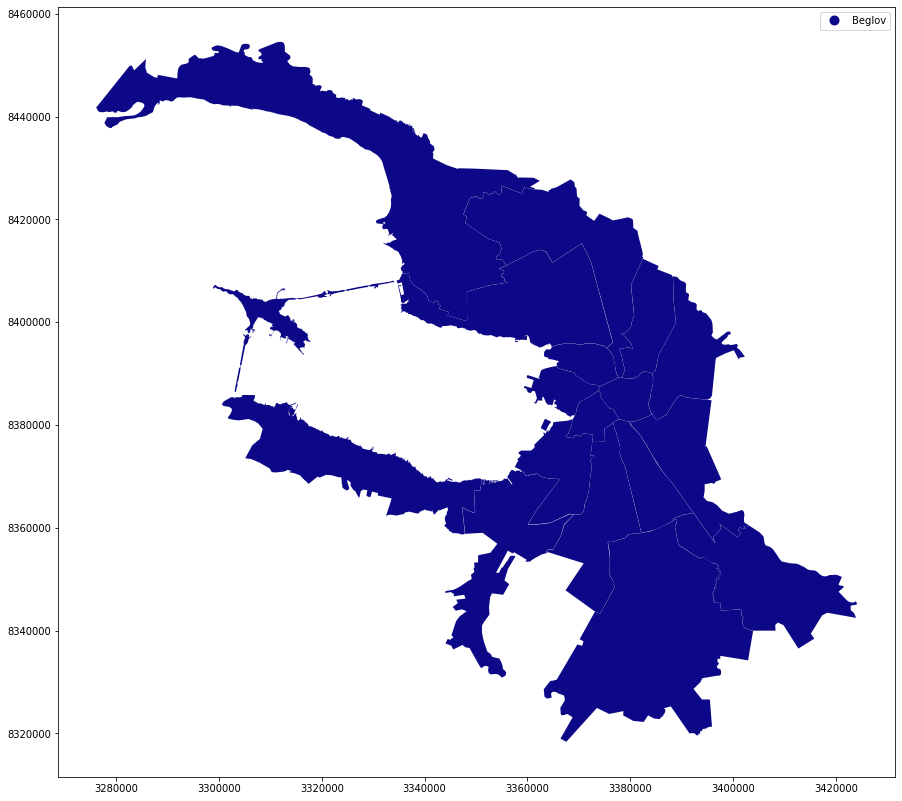

In [22]:
SPB_elections_visualization.plot(column = 'Winner', linewidth=0, cmap='plasma', legend=True, figsize=[15,15])

### Districts

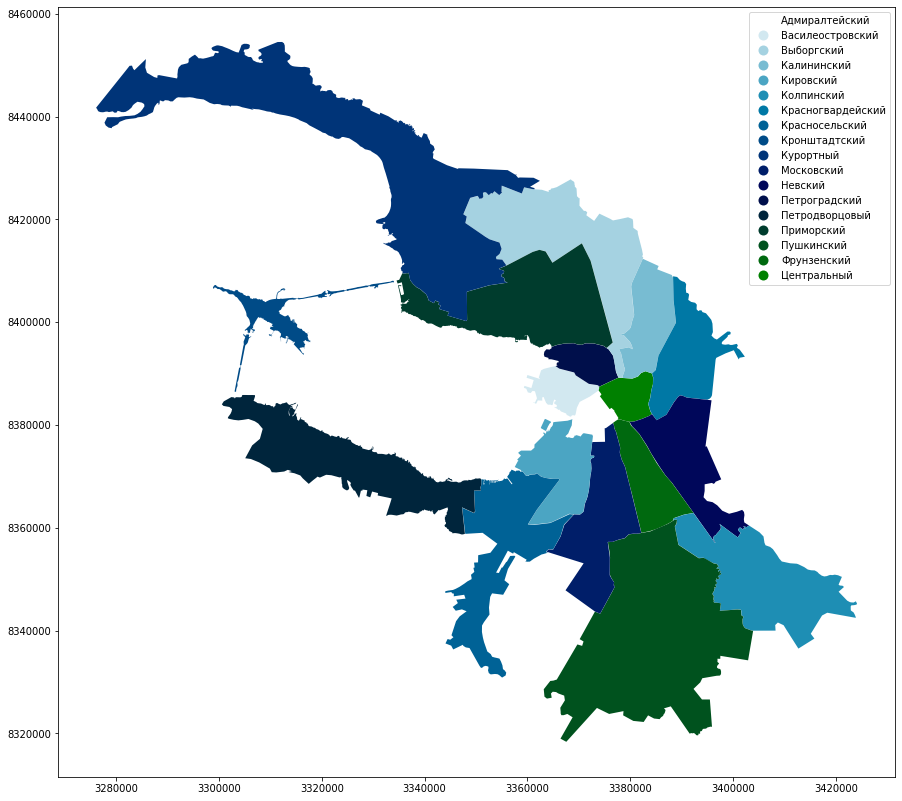

In [23]:
SPB_elections_visualization.plot(column = 'Район', linewidth=0, cmap='ocean_r', legend=True, figsize=[15,15])

### Voters

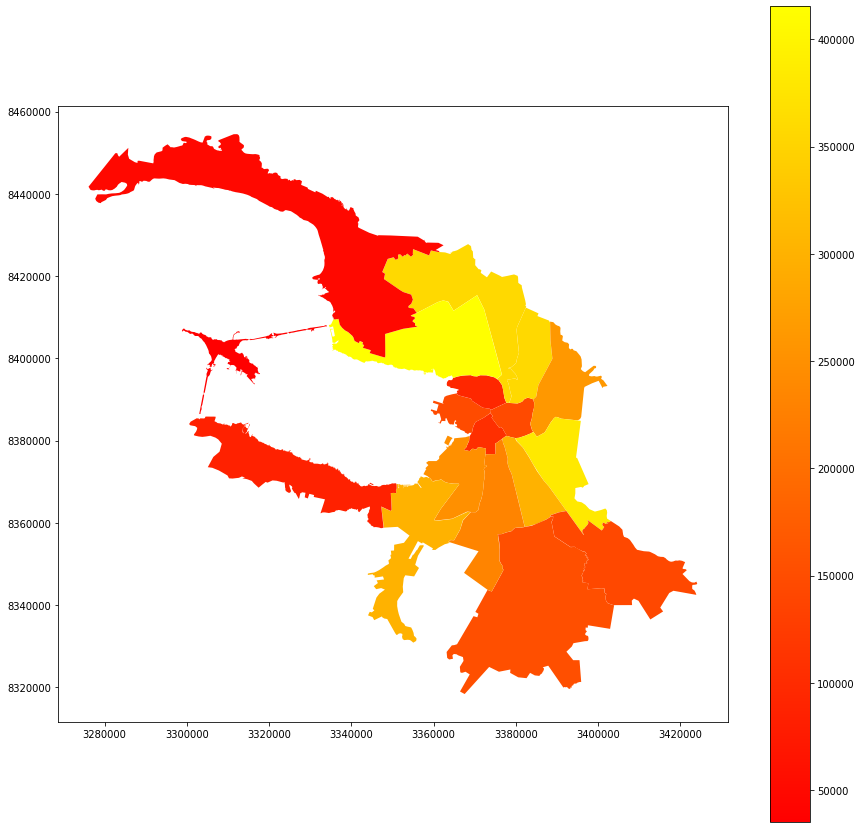

In [16]:
SPB_elections_visualization.plot(column = 'Количество избирателей', linewidth=0, cmap='autumn', legend=True, figsize=[15,15])

### Appearance

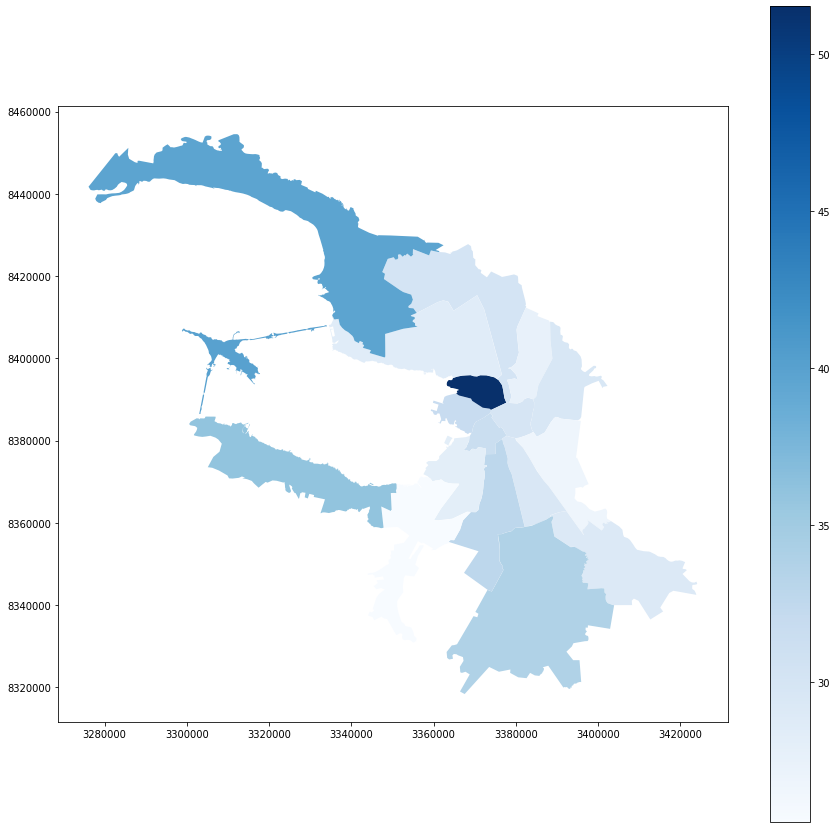

In [17]:
SPB_elections_visualization.plot(column = 'Явка', linewidth=0, cmap='Blues', legend=True, figsize=[15,15])